<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/20%20-%20Sklearn%20(les%20Bases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20/30 Apprentissage Supervisé avec Sklearn

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1. Régression

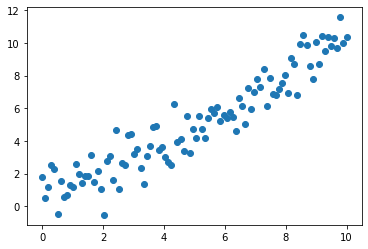

In [2]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.scatter(X, y)

In [0]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

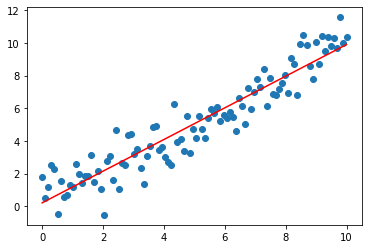

In [6]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

##2. Classification

In [8]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model = KNeighborsClassifier()

In [0]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [14]:
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

0.8319327731092437

##3. Prediction de survie

In [0]:
def survie(model, pclass=3, sex=0, age=26):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [18]:
survie(model)

[0]
[[0.6 0.4]]


## 4. Exercice et Solution
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

2


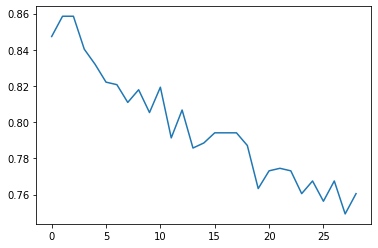

In [19]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)